In [13]:
%matplotlib inline

In [45]:
from tensorflow.examples.tutorials.mnist import input_data
# import tensorflow.examples.tutorials.mnist.input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [78]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# 训练集文件
train_images_idx3_ubyte_file = './MNIST_data/train-images.idx3-ubyte'
# 训练集标签文件
train_labels_idx1_ubyte_file = './MNIST_data/train-labels.idx1-ubyte'

# 测试集文件
test_images_idx3_ubyte_file = './MNIST_data/t10k-images.idx3-ubyte'
# 测试集标签文件
test_labels_idx1_ubyte_file = './MNIST_data/t10k-labels.idx1-ubyte'


def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print '魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols)

    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print '已解析 %d' % (i + 1) + '张'
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images


def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print '魔数:%d, 图片数量: %d张' % (magic_number, num_images)

    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print '已解析 %d' % (i + 1) + '张'
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):
    """
    TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):
    """
    TRAINING SET LABEL FILE (train-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)


def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):
    """
    TEST SET IMAGE FILE (t10k-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  10000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):
    """
    TEST SET LABEL FILE (t10k-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  10000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)



def run():
    global train_images,train_labels
    train_images = load_train_images()
    train_labels = load_train_labels()
    # test_images = load_test_images()
    # test_labels = load_test_labels()

    # 查看前十个数据及其标签以读取是否正确
#     for i in range(10):
#         print train_labels[i]
#         plt.imshow(train_images[i], cmap='gray')
#         plt.show()
#     print 'done'

if __name__ == '__main__':
    run()


魔数:2051, 图片数量: 60000张, 图片大小: 28*28
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张


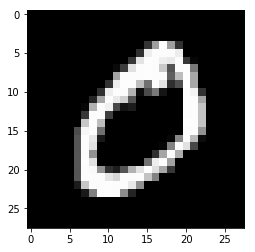

(784, 60000)

In [97]:
plt.imshow(train_images.reshape(60000,784).T[:,1].reshape(28,28), cmap='gray')
plt.show()
train_images.reshape(60000,784).T.shape
# train_images[1].reshape(784)

In [113]:
x = train_images[train_labels <= 1]
y = train_labels[train_labels <= 1]
x = x.reshape(len(y),784).T
y = y.reshape(1,len(y))
print x.shape
print y.shape
np.save('x.npy',x)
np.save('y.npy',y)

(784, 12665)
(1, 12665)


In [115]:
np.load('./x.npy').shape

(784, 12665)

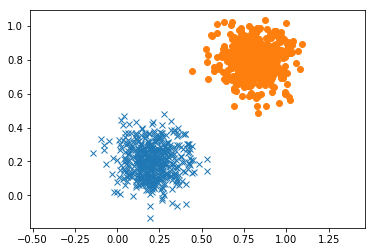

(4, 6)
6
4


(array([[ 0.81535336,  0.10862824,  0.29286707,  0.76542651],
        [ 0.74057633,  0.14970702,  0.2637996 ,  0.95880501],
        [ 0.74057633,  0.14970702,  0.2637996 ,  0.95880501],
        [ 0.74057633,  0.14970702,  0.2637996 ,  0.95880501]]),
 array([[-1,  1,  1, -1]]),
 array([[ 0.31327345],
        [ 0.30723518],
        [ 0.30723518],
        [ 0.30723518]]),
 array([[1]]))

In [116]:
import matplotlib.pyplot as plt
import numpy as np

def generate_toy_data():

    mean_a = [0.2, 0.2]
    cov_a = [[0.01, 0], [0, 0.01]]  # diagonal covariance

    mean_b = [0.8, 0.8]
    cov_b = [[0.01, 0], [0, 0.01]]  # diagonal covariance


    class_a_x = np.random.multivariate_normal(mean_a, cov_a, 500).T
    class_b_x = np.random.multivariate_normal(mean_b, cov_b, 500).T
#     print class_a_x
    class_a_y = np.ones(np.size(class_a_x[0]))
    class_b_y = -1*np.ones(np.size(class_b_x[0]))

#     """
    plt.plot(class_a_x[0], class_a_x[1], 'x')
    plt.plot(class_b_x[0], class_b_x[1], 'o')
    plt.axis('equal')
    plt.show()
#     """

    data_x = np.concatenate((class_a_x, class_b_x), axis=1)
    data_y = np.concatenate((class_a_y, class_b_y), axis=0)

    num = data_y.size
    randomize = np.arange(num)
    np.random.shuffle(randomize)
    data_x = data_x[:,randomize]
    data_y = data_y[randomize]
    """
    plt.plot(data_x[0], data_x[1], 'x')
    plt.axis('equal')
    plt.show()
    """
    data_x = np.array([[0.81535336,  0.10862824,  0.29286707,  0.76542651,0.31327345,  0.72032543],
              [0.74057633,  0.14970702,  0.2637996 ,  0.95880501,0.30723518,  0.83414142],
                      [0.74057633,  0.14970702,  0.2637996 ,  0.95880501,0.30723518,  0.83414142],
                      [0.74057633,  0.14970702,  0.2637996 ,  0.95880501,0.30723518,  0.83414142]])
    print data_x.shape
    num = data_x.shape[1]
    print num
    data_y = np.array([[-1,  1,  1,-1,1,-1]])
    inter = int(0.8*num)
    print inter
    data_y = data_y.reshape(1,num)
    return data_x[:,0:inter],data_y[:,0:inter],data_x[:,inter:-1],data_y[:,inter:-1]


#dd = generate_toy_data()
#print("ok")

generate_toy_data()

In [10]:
train_data_x.shape


(2, 800)

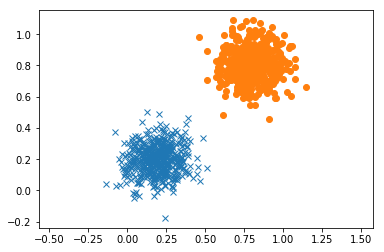

(4, 6)
6
4
warm start, err :3.31928718133
iteration 1, err :0.159778459331
iteration 2, err :0.127529480218
iteration 3, err :0.116311910765
iteration 4, err :0.105771867967
iteration 5, err :0.0960222347823
iteration 6, err :0.0870684677304
iteration 7, err :0.0788830617231
iteration 8, err :0.0714229588992
iteration 9, err :0.408930905351
iteration 10, err :0.206908301126
iteration 11, err :0.174359767515
iteration 12, err :0.145268490349
iteration 13, err :0.131734836839
iteration 14, err :0.119537702491
iteration 15, err :0.108460886851
iteration 16, err :0.0984022062334
iteration 17, err :0.119224966397
iteration 18, err :0.108745474764
iteration 19, err :0.0990466726439
iteration 20, err :0.0901121734478
layer 1 value: 

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
layer 2 value: 

[[0]
 [0]
 [0]
 [0]
 [0]]
layer 3 value: 

[[ 0.]]
test data predict accuracy: 1.0
iteration 21, err :0.0819533460136
iteration 22, err :0.0745194205811
iteration 23, err :0.0677549792834
iterati

In [117]:
import numpy as np
# from toy_data import generate_toy_data
feat_num = 4
layer_1_units = 10
layer_2_units = 5
beta = 10
gamma = 1
grow_rate = 5
warm_start = 1
err_tol = 1e-8
err_tol = 0.01
from numpy import vectorize

train_data_x, train_data_y,test_data_x, test_data_y = generate_toy_data()
data_num = train_data_y.size

a_0 = train_data_x
a_0_pinv = np.linalg.pinv(a_0)
W_1 = np.zeros((layer_1_units,feat_num))
init_var = 1
z_1 = init_var * np.random.randn(layer_1_units,data_num)
a_1 = init_var * np.random.randn(layer_1_units,data_num)

W_2 = np.zeros((layer_2_units,layer_1_units))
z_2 = init_var * np.random.randn(layer_2_units,data_num)
a_2 = init_var * np.random.randn(layer_1_units,data_num)

W_3 = np.zeros((1,layer_2_units))
z_3 = init_var * np.random.randn(1,data_num)

_lambda = np.zeros((1,data_num))
#_lambda = np.random.randn(1,data_num)

def activation(i):
    if i > 0:
        return i
    else:
        return 0

def get_z_l(a,w_a):
    def f_z(z):
        return gamma*(a-activation(z))**2 + beta*(z-w_a)**2

    z1 = max((a*gamma+w_a*beta)/(beta+gamma),0)
    result1 = f_z(z1)

    z2 = min(w_a,0)
    result2 = f_z(z2)

    if result1 <= result2:
        return z1
    else:
        return z2



def get_z_L(y,w_a,_lambda):
    if y==-1:
        def f_z(z):
            return beta*z**2 - (2*beta*w_a-_lambda)*z + max(1+z,0)

        z1 = min((2*beta*w_a - _lambda)/(2*beta),-1)
        z2 = max((2*beta*w_a-_lambda-1)/(2*beta),-1)
        if f_z(z1) < f_z(z2):
            return z1
        else:
            return z2

    if y==1:
        def f_z(z):
            return beta*z**2 - (2*beta*w_a - _lambda)*z + max(1-z,0)
        z1 = min((2*beta*w_a - _lambda+1)/(2*beta),1)
        z2 = max((2*beta*w_a - _lambda)/(2*beta),1)

        if f_z(z1) < f_z(z2):
            return z1
        else:
            return z2

    else:
        print("error class: {}".format(y))
        exit()


def get_predict(pre):
    if pre >= 0:
        return 1
    else:
        return -1

def get_loss(pre,gt):
    if gt==-1:
        return max(1+pre,0)
    elif gt==1:
        return max(1-pre,0)
    else:
        print("invalid gt..")
        exit()


vactivation = vectorize(activation)
vget_z_l = vectorize(get_z_l)
vget_z_L = vectorize(get_z_L)
vget_predict = vectorize(get_predict)
vget_loss = vectorize(get_loss)

def update(is_warm_start = False):
    global  z_1,z_2,z_3,_lambda,W_1,W_2,W_3
    # update layer 1
    old_W_1 = W_1
    old_z_1 =z_1
    W_1 = np.dot(z_1, a_0_pinv)
    a_1_left = np.linalg.inv((beta * np.dot(np.transpose(W_2), W_2) + gamma * np.eye(layer_1_units, dtype=float)))
    a_1_right = (beta * np.dot(np.transpose(W_2), z_2) + gamma * vactivation(z_1))
    a_1 = np.dot(a_1_left,a_1_right)
    z_1 = vget_z_l(a_1, np.dot(W_1, a_0))

    # update layer 2
    W_2 = np.dot(z_2, np.linalg.pinv(a_1))
    #numpy.linalg.linalg.LinAlgError: Singular matrix
    a_2_left = np.linalg.inv((beta * np.dot(np.transpose(W_3), W_3) + gamma * np.eye(layer_2_units, dtype=float)))
    a_2_right = (beta * np.dot(np.transpose(W_3), z_3) + gamma * vactivation(z_2))
    a_2 = np.dot(a_2_left , a_2_right)
    z_2 = vget_z_l(a_2, np.dot(W_2, a_1))

    # update last layer
    W_3 = np.dot(z_3, np.linalg.pinv(a_2))
    z_3 = vget_z_L(train_data_y, np.dot(W_3, a_2),_lambda)

    #print("z_3: ")
    #print(z_3)
    loss = vget_loss(z_3,train_data_y)
    #print("loss: {}".format(loss))
    #print("lambda: ")
    #print(_lambda)


    if not is_warm_start:
        _lambda = _lambda + beta * (z_3 - np.dot(W_3,a_2))

    #ret = np.linalg.norm(z_3 - np.dot(W_3,a_2),2)
    #ret = np.linalg.norm(old_W_1-W_1,2)
    ret = np.linalg.norm(old_z_1 - z_1, 2)
    return ret

def test():
    a_0 = test_data_x
    layer_1_output = vactivation(np.dot(W_1,a_0))
    layer_2_output = vactivation(np.dot(W_2,layer_1_output))
    predict = np.dot(W_3,layer_2_output)
    pre = vget_predict(predict)

    print("layer 1 value: \n")
    print(layer_1_output)
    print("layer 2 value: \n")
    print(layer_2_output)
    print("layer 3 value: \n")
    print(predict)


    hit = np.equal(pre,test_data_y)
    acc = np.sum(hit)*1.0/test_data_y.size
    print("test data predict accuracy: {}".format(acc))

def train():
    global  beta,gamma
    #warm start
    for i in range(warm_start):
        loss = update(is_warm_start=True)
        print("warm start, err :{}".format(loss))
    #real start
    i = 1
    while 1:
        loss = update(is_warm_start=False)
        print("iteration {}, err :{}".format(i,loss))
        if i%100 == 0:
            beta =  grow_rate* beta
            gamma = gamma* beta

        if i%20==0:
            test()
        i = i + 1
        if loss < err_tol:
            break





train()
test()





